# Assignment 2: Classification
## Applied Machine Learning (BUAN 6341)


Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file
- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Write down your discussion in the given cells, denoted as "YOUR DISCUSSION HERE"
- Submit THREE files: .pdf, .ipynb, and .html files to eLearning (You may need to zip the files).


This assignment covers Supervised Learning models. In this assignment, you are required to use one clean dataset to train FOUR classification models for discrete targets.


The total score of the implementation part is: 70

In [1]:
NAME = "Pooja Patel"

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data
The cell below completes three tasks: 
1. Generating the data for today's task. You will get two predictors and one binary target. The data has 10,000 observations.
2. Splitting the data (75% training and 25% test).
3. Visualizing the data (first 1000 records) using scatter plot.

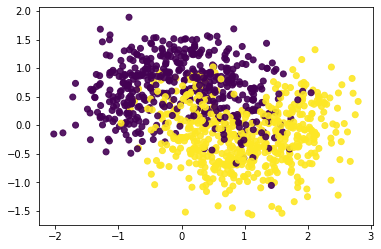

In [3]:
# Generating Data
from sklearn.datasets import make_moons
(X, y) = make_moons(n_samples=10000, noise=0.4, random_state=0)

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scatter Plot
plt.scatter(X[0:1000,0],X[0:1000,1], c = y[0:1000], alpha = 0.9)
plt.show()

As we can see from the figure, the two classes does not seem to be linearly separable and can create some challenges for classification. Let us try different models to complete the classification task and check their performance.

### Question 1 (15 points)
- Train a k-NN model with grid search and cross-validation. Let the choices of k be: [5, 10, 15, 20, 25]. Use 5-fold cross-validation.
- Report (1) the best k chosen, (2) the test accuracy under the best model, and (3) the mean validation accuracy through the cross-validation process (under the best model).
- Note: This model may take several seconds to run.

In [35]:
# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(5, 26, 5)}  

grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

print('Best k:', grid_knn.best_params_)
print("Test Accuracy: ", grid_knn.score(X_test,y_test))
print('Mean Validation Score:', grid_knn.best_score_)

Best k: {'n_neighbors': 25}
Test Accuracy:  0.8616
Mean Validation Score: 0.8655999999999999


### Question 2 (15 points)
- Train a decision tree classifier with grid search and cross-validation. Set random_state as 0. Let us twist the maximum depth of the tree (i.e., max_depth). Consider all integers between 1 and 20 for max_depth (include both 1 and 20). Use 5-fold cross-validation.
- Report (1) the best max_depth chosen, (2) the test accuracy under the best model, and (3) the mean validation accuracy through the cross-validation process (under the best model).

In [28]:
# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
dt_tree = DecisionTreeClassifier(random_state = 0)
dt_tree.fit(X_train, y_train)
dt_params = {'max_depth': range(1,21)}

grid_tree = GridSearchCV(dt_tree, dt_params, cv = 5)
grid_tree.fit(X_train, y_train)

print("Max Depth: ", grid_tree.best_params_)
print("Mean Validation: ", grid_tree.best_score_)
print("Test Accuracy: ", grid_tree.score(X_test,y_test))

Max Depth:  {'max_depth': 4}
Mean Validation:  0.8574666666666667
Test Accuracy:  0.8492


### Question 3 (15 points)
- Train a linear svm classifier with grid search and cross-validation. Set random_state as 0. Let the choices of C be: [0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]. Use 5-fold cross-validation.
- Report (1) the best C chosen, (2) the test accuracy under the best model, and (3) the mean validation accuracy through the cross-validation process (under the best model).
- Given the choice, discuss briefly: do you think a hard-margin SVM can outperform soft-margin SVM in this case? Why?

In [32]:
# YOUR CODE HERE
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state = 0) # must specify random state here

params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000] }

grid_lr_svc = GridSearchCV(linear_svc, params_svc, cv = 5, n_jobs = 2)
grid_lr_svc.fit(X_train, y_train)

print("Best C: ", grid_lr_svc.best_params_)
print("Test score: ", grid_lr_svc.score(X_test,y_test))
print("Mean Validation: ", grid_lr_svc.best_score_)


Best C:  {'C': 0.01}
Test score:  0.8256
Mean Validation:  0.8349333333333334


In [ ]:
# YOUR DISCUSSION HERE

# Hard-margin can not outperform a soft-margin SVM in this case because hard margin needs 2 classes which is not applicable in our case.


### Question 4 (15 points)
- Train a kernel svm classifier with grid search and cross-validation. Set random_state as 0. Let's apply rbf kernel. Let the choices of C be: [0.1, 1, 10]. Let the choices of gamma be: [0.01, 1, 10]. Use 5-fold cross-validation.
- Report (1) the best C and gamma chosen, (2) the test accuracy under the best model, and (3) the mean validation accuracy through the cross-validation process (under the best model).
- Note: The code may take up to several minutes to run. 

In [34]:
# YOUR CODE HERE

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

base_k = SVC(random_state= 0, kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C':  [0.1, 1, 10]     ,
                    'gamma':   [0.01, 1, 10]   } # C = 10,000 mimics hard-margin SVM
#apply grid search
grid_kernel = GridSearchCV(base_k, param_svc_kernel, cv = 5, n_jobs=2)
grid_kernel.fit(X_train, y_train)

print("Best C: ", grid_kernel.best_params_)
print("Test score: ", grid_kernel.score(X_test,y_test))
print("Mean Validation: ", grid_kernel.best_score_)

Best C:  {'C': 10, 'gamma': 10}
Test score:  0.8644
Mean Validation:  0.8664


### Question 5 (10 Points)
- Compare the mean validation score across all models. If we would like to choose one model for prediction based on model performance (i.e., in this case, accuracy), which one would you choose? Explain briefly.

In [ ]:
# YOUR DISCUSSION HERE

# We would choose the Kernel SVM Classifier since it returns the highest mean validation score of 86.64%.